# Import 및 Mount


In [ ]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,Activation,BatchNormalization
from keras.models import Sequential
from keras.callbacks import Callback

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


train_images = []       
train_labels = []
fresh_labels = []
shape = (200,200)  
train_path = '/content/drive/MyDrive/딥러닝_프로젝트_과채어때컴퍼니조/data/archive/'
archive_dir = os.listdir(train_path)
# print(archive_dir)
for dirname in archive_dir:
    if dirname == "ImageLabels.txt":
        continue
    image_list = os.listdir(train_path + dirname)
    for j in range(len(image_list)):
      image_list[j] = train_path + dirname + '/' + image_list[j]
    for file in image_list:
        root, child = os.path.splitext(file)
        if child in ['.png', '.jpg','.jpeg']:
            img = cv2.imread(file)
            cv2.cvtColor(img, cv2.COLOR_BGR2RGB, dst = img)
            
            # Spliting file names and storing the labels for image in list
            
            train_labels.append(file.split('/')[-2].split('_')[-1])
            # print(file)
            # Resize all images to a specific shape
            img = cv2.resize(img,shape)
            
            train_images.append(img)
# print(train_images)
# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

# 트레이닝 데이터 프로세싱

In [ ]:
train_images = []       
train_labels = []
fresh_labels = []
shape = (200,200)  
train_path = '/content/drive/MyDrive/딥러닝_프로젝트_과채어때컴퍼니조/data/'
archive_dir = os.listdir(train_path)
archive_dir.sort()
print(archive_dir)
for dirname in archive_dir:
    if dirname == "ImageLabels.txt":
        continue
    image_list = os.listdir(train_path + dirname)
    for j in range(len(image_list)):
      image_list[j] = train_path + dirname + '/' + image_list[j]
    for file in image_list:
        root, child = os.path.splitext(file)
        if child in ['.png', '.jpg','.jpeg']:
            img = cv2.imread(file)
            cv2.cvtColor(img, cv2.COLOR_BGR2RGB, dst = img)
            
            # Spliting file names and storing the labels for image in list
            split_list = file.split('/')[-2].split('_')
            train_labels.append(split_list[-1])
            fresh_labels.append(split_list[-2])
            
            # Resize all images to a specific shape
            img = cv2.resize(img,shape)
            
            train_images.append(img)

# Converting labels into One Hot encoded sparse matrix

# Converting train_images to array
train_images = np.array(train_images)

train_labels = pd.get_dummies(train_labels)
fresh_labels = pd.get_dummies(fresh_labels)
print('train',train_labels.columns)
print('fresh',fresh_labels.columns)
train_labels = train_labels.values
fresh_labels = fresh_labels.values

train_labels = np.concatenate((train_labels,fresh_labels),axis=1)
print('class:',train_labels.tolist())
# Splitting Training data into train and validation dataset
x_train,x_test,y_train,y_test = train_test_split(train_images,train_labels,random_state=1, test_size = 0.2)

# Splitting Test data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,random_state=1, test_size = 0.3)

['fresh_apple', 'fresh_banana', 'fresh_broccoli', 'fresh_capsicum', 'fresh_cherryTomato', 'fresh_grape', 'fresh_orange', 'fresh_peach', 'fresh_pepper', 'fresh_strawberry', 'stale_apple', 'stale_banana', 'stale_broccoli', 'stale_capsicum', 'stale_cherryTomato', 'stale_grape', 'stale_orange', 'stale_peach', 'stale_pepper', 'stale_strawberry']
train Index(['apple', 'banana', 'broccoli', 'capsicum', 'cherryTomato', 'grape',
       'orange', 'peach', 'pepper', 'strawberry'],
      dtype='object')
fresh Index(['fresh', 'stale'], dtype='object')
class: [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
train_labels

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1]], dtype=uint8)

In [ ]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape, x_test.shape,y_test.shape

((2741, 200, 200, 3),
 (2741, 12),
 (1175, 200, 200, 3),
 (1175, 12),
 (980, 200, 200, 3),
 (980, 12))

In [ ]:
import pandas as pd

pd.Series(y_train.reshape(-1)).value_counts()

0    27410
1     5482
dtype: int64

In [ ]:
train_labels

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1]], dtype=uint8)


# 테스팅 데이터 프로세싱

In [ ]:
# # -> appending images in a list 'test_images'
# # -> appending labels in a list 'test_labels'
# # The test data contains labels as well also we are appending it to a list but we are'nt going to use it while training.

# test_images = []
# test_labels = []
# fresh_labels = []
# shape = (200,200)
# test_path = '/content/drive/MyDrive/딥러닝_프로젝트_과채어때컴퍼니조/data/'

# for dirname in archive_dir:
#     if dirname == "ImageLabels.txt":
#         continue
#     image_list = os.listdir(test_path + dirname)
#     for j in range(len(image_list)):
#       image_list[j] = test_path + dirname + '/' + image_list[j]
#     for file in image_list:
#         root, child = os.path.splitext(file)
#         if child in ['.png', '.jpg','.jpeg']:
#             img = cv2.imread(file)
#             cv2.cvtColor(img, cv2.COLOR_BGR2RGB, dst = img) 

#             # Spliting file names and storing the labels for image in list
#             split_list = file.split('/')[-2].split('_')
#             test_labels.append(split_list[-1])
#             fresh_labels.append(split_list[-2])
            
#             # Resize all images to a specific shape
#             img = cv2.resize(img,shape)
            
#             test_images.append(img)
        
# # Converting test_images to array
# test_images = np.array(test_images)

# test_labels = + test_labels

# 비쥬얼라이징 

[0 0 0 0 0 1 0 0 0 0 1 0]
(200, 200, 3)


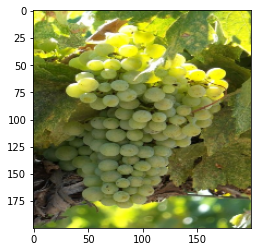

In [ ]:
# Visualizing Training data
print(train_labels[1200])
print(train_images[1200].shape)
plt.imshow(train_images[1200])

In [ ]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=128, activation='relu', input_shape=(200,200,3)))
model.add(Conv2D(filters=64,kernel_size = (3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=64,kernel_size = (3,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size = (3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=128,kernel_size = (3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size = (3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128))
model.add(Dropout(0.35))

model.add(Dense(64,activation='relu'))
model.add(Dense(12,activation = 'sigmoid'))



    
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

# Model Summary

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 198, 198, 128)     3584      
                                                                 
 conv2d_31 (Conv2D)          (None, 196, 196, 64)      73792     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 98, 98, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 96, 96, 128)       73856     
                                                                 
 conv2d_33 (Conv2D)          (None, 94, 94, 64)        73792     
                                                                 
 batch_normalization_12 (Bat  (None, 94, 94, 64)       256       
 chNormalization)                                     

# 모델 시각화

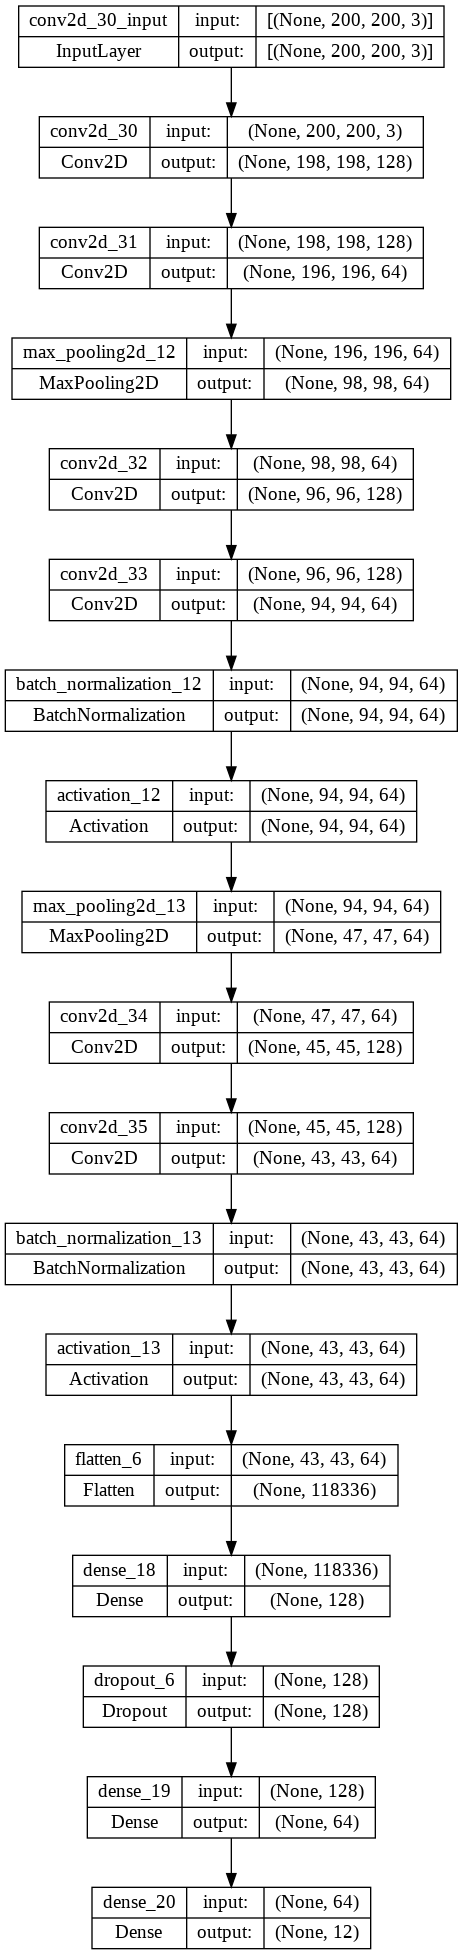

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

# model 트레이닝

In [ ]:
history = model.fit(x_train,y_train,epochs=10,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/10
55/55 [==============================] - 18s 321ms/step - loss: 0.9092 - binary_accuracy: 0.8083 - val_loss: 1.6923 - val_binary_accuracy: 0.8144
Epoch 2/10
55/55 [==============================] - 17s 319ms/step - loss: 0.3706 - binary_accuracy: 0.8504 - val_loss: 0.5908 - val_binary_accuracy: 0.8095
Epoch 3/10
55/55 [==============================] - 18s 321ms/step - loss: 0.3249 - binary_accuracy: 0.8657 - val_loss: 0.4771 - val_binary_accuracy: 0.8106
Epoch 4/10
55/55 [==============================] - 18s 323ms/step - loss: 0.2845 - binary_accuracy: 0.8823 - val_loss: 0.5039 - val_binary_accuracy: 0.8131
Epoch 5/10
55/55 [==============================] - 18s 325ms/step - loss: 0.2420 - binary_accuracy: 0.9014 - val_loss: 0.4484 - val_binary_accuracy: 0.8246
Epoch 6/10
55/55 [==============================] - 18s 326ms/step - loss: 0.1974 - binary_accuracy: 0.9207 - val_loss: 0.4191 - val_binary_accuracy: 0.8364
Epoch 7/10
55/55 [==============================] - 18s 32

In [ ]:
print(y_train.shape, x_train.shape, x_val.shape, y_val.shape)

(2741, 12) (2741, 200, 200, 3) (1175, 200, 200, 3) (1175, 12)


# 정확도

In [ ]:
history.history

{'loss': [0.9092461466789246,
  0.3705774247646332,
  0.32489466667175293,
  0.28449374437332153,
  0.24197016656398773,
  0.19741493463516235,
  0.1576825976371765,
  0.1283133327960968,
  0.10566601902246475,
  0.08247599005699158],
 'binary_accuracy': [0.808342456817627,
  0.8504195809364319,
  0.8656815886497498,
  0.8822510838508606,
  0.9013741612434387,
  0.9206799268722534,
  0.9367626905441284,
  0.9505654573440552,
  0.9607504606246948,
  0.9699625372886658],
 'val_loss': [1.6923234462738037,
  0.5907756090164185,
  0.47705021500587463,
  0.5039193630218506,
  0.44843900203704834,
  0.4190998375415802,
  0.39669638872146606,
  0.40388092398643494,
  0.4645587205886841,
  0.6047829985618591],
 'val_binary_accuracy': [0.8143972754478455,
  0.809503436088562,
  0.8105674386024475,
  0.8131205439567566,
  0.8246098756790161,
  0.8363829255104065,
  0.839645504951477,
  0.8468085527420044,
  0.8398581147193909,
  0.8450354337692261]}

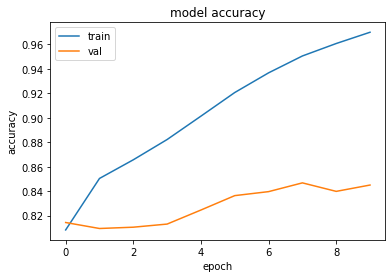

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# loss 

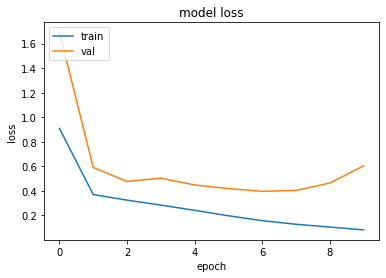

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluating model on validation data


In [ ]:
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

37/37 [==============================] - 2s 54ms/step - loss: 0.6048 - binary_accuracy: 0.8450
[0.6047830581665039, 0.8450354933738708]


In [ ]:
train_images[0:1].shape

(1, 200, 200, 3)

1/1 [==============================] - 0s 203ms/step
[[2.0709728e-04 1.6421912e-04 1.7164992e-04 9.9903738e-01 1.4414309e-02
  6.3078490e-04 3.9716673e-04 1.4872009e-02 2.6545874e-04 2.6079526e-03
  9.9897027e-01 7.2758715e-03]]
Actual :-  [0 0 0 1 0 0 0 0 0 0 1 0]
Predicted :-  capsicum
Predicted :-  fresh


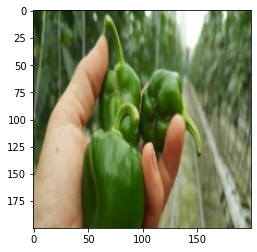

In [ ]:
checkImage = train_images[821].reshape(-1,200, 200, 3)
plt.imshow(train_images[821])
checklabel = train_labels[821]

predict = model.predict(np.array(checkImage))
print(predict)
class_name = ['apple', 'banana', 'broccoli', 'capsicum', 'cherryTomato', 'grape', 'orange', 'peach', 'pepper', 'strawberry']
class_name1 = ['fresh', 'stale']

print("Actual :- ",checklabel)
print("Predicted :- ",class_name[np.argmax(predict[0][:-2])])
print("Predicted :- ",class_name1[np.argmax(predict[0][-2:])])

(200, 200, 3)
1/1 [==============================] - 0s 17ms/step
Actual :-  [[2.78315012e-04 8.18235893e-03 8.21226786e-06 1.06094485e-04
  9.26762164e-01 2.53444668e-02 2.16321598e-04 6.93841430e-04
  4.03954834e-02 5.27273072e-03 2.27860227e-01 9.93935049e-01]]
Predicted :-  cherryTomato
Predicted :-  stale
[2.78315012e-04 8.18235893e-03 8.21226786e-06 1.06094485e-04
 9.26762164e-01 2.53444668e-02 2.16321598e-04 6.93841430e-04
 4.03954834e-02 5.27273072e-03 2.27860227e-01 9.93935049e-01]


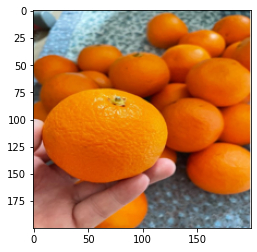

In [ ]:
path='/content/drive/MyDrive/딥러닝_프로젝트_과채어때컴퍼니조/test_data/test_orange.jpg'
from PIL import Image
import numpy as np
image = Image.open(path)
image = image.resize((200,200))
print(np.array(image).shape)
x = np.expand_dims(np.array(image),0)
#print(x.shape)
plt.imshow(image)
y_predict = model.predict(x)
# output.get(np.argmax(model.predict(x)))
class_name = ['apple', 'banana', 'broccoli', 'capsicum', 'cherryTomato', 'grape', 'orange', 'peach', 'pepper', 'strawberry']
class_name1 = ['fresh', 'stale']

print("Actual :- ",y_predict)
print("Predicted :- ",class_name[np.argmax(y_predict[0][:-2])])
print("Predicted :- ",class_name1[np.argmax(y_predict[0][-2:])])
# y_predict_100 = y_predict[0] *
print(y_predict[0])
# model.predict(x)

In [ ]:
train_labels

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1]], dtype=uint8)

In [ ]:
model.evaluate(x_test,y_test)

31/31 [==============================] - 1s 38ms/step - loss: 0.8452 - binary_accuracy: 0.8779


[0.845206081867218, 0.8778910636901855]